In [ ]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as  px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
#load the dataset 
df = pd.read_csv('country_wise_latest.csv')

In [ ]:
#Print initial 10 rows or first 10 rows
df.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [ ]:
#print final 10 rows or last 10 rows
df.tail(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
178,Uruguay,1202,35,951,216,10,1,3,2.91,79.12,3.68,1064,138,12.97,Americas
179,Uzbekistan,21209,121,11674,9414,678,5,569,0.57,55.04,1.04,17149,4060,23.67,Europe
180,Venezuela,15988,146,9959,5883,525,4,213,0.91,62.29,1.47,12334,3654,29.63,Americas
181,Vietnam,431,0,365,66,11,0,0,0.00,84.69,0.00,384,47,12.24,Western Pacific
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa


In [ ]:
df.shape
#number of columns - 15
#number of rows - 187

(187, 15)

In [ ]:
df.dtypes
#check the datatypes of the entire dataset

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

In [ ]:
df.isna().sum().count
#check whether there is any NULL value, if yes then replace it by dummy values or use simple imputer 

<bound method Series.count of Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64>

In [ ]:
#Now, we will try to gather some insights from the data by checking active cases w.r.t countries/region wise 
#check which country/region has the most active cases
active_cases = df[['Country/Region','Active']].sort_values(by=['Active'],ascending=False).head(10)
active_cases

,Country/Region,Active
173,US,2816444
23,Brazil,508116
79,India,495499
177,United Kingdom,254427
138,Russia,201097
154,South Africa,170537
37,Colombia,117163
61,France,108928
32,Canada,107514
132,Peru,98752


In [ ]:
#Now, Visualize the data using bargraph
bg = px.bar(activeCaseinCountries, x='Active', y='Country/Region', title='Top 10 Countries of Most Active Cases')
bg

In [ ]:
##Now, we will try to gather some insights from the data by checking Deaths cases w.r.t countries/region wise 
#check which country/region has the most Deaths occurance.
Death_cases = df[['Country/Region', 'Deaths']].sort_values(by='Deaths', ascending = False).head(10)
Death_cases

,Country/Region,Deaths
173,US,148011
23,Brazil,87618
177,United Kingdom,45844
111,Mexico,44022
85,Italy,35112
79,India,33408
61,France,30212
157,Spain,28432
132,Peru,18418
81,Iran,15912


In [ ]:
Death_bg = px.bar(DeathCaseinCountries, x = 'Deaths', y = 'Country/Region', title = 'Top 10 Countries of Most Deaths')
Death_bg.show()

In [ ]:
#Check whether there is any categorical data ,if yes then use label encoder which categorizes the data by specifying the value a number  
#starting from 0 to n-1 , n-no.of.categories
label_encoder = LabelEncoder()
df['Country/Region']= label_encoder.fit_transform(df['Country/Region'])
df['Country/Region'].unique()
df['WHO Region']= label_encoder.fit_transform(df['WHO Region'])
df['WHO Region'].unique()

array([2, 3, 0, 1, 5, 4])

In [ ]:
df.head(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,2
1,1,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,3
2,2,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,0
3,3,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,3
4,4,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,0


In [ ]:
#create a new dataframe including only required columns i.e  Country/Region,Confirmed,Deaths,Recovered,Active
df1= df[["Country/Region","Confirmed","Deaths","Recovered","Active"]]

In [ ]:
df1.head(5)

,Country/Region,Confirmed,Deaths,Recovered,Active
0,0,36263,1269,25198,9796
1,1,4880,144,2745,1991
2,2,27973,1163,18837,7973
3,3,907,52,803,52
4,4,950,41,242,667


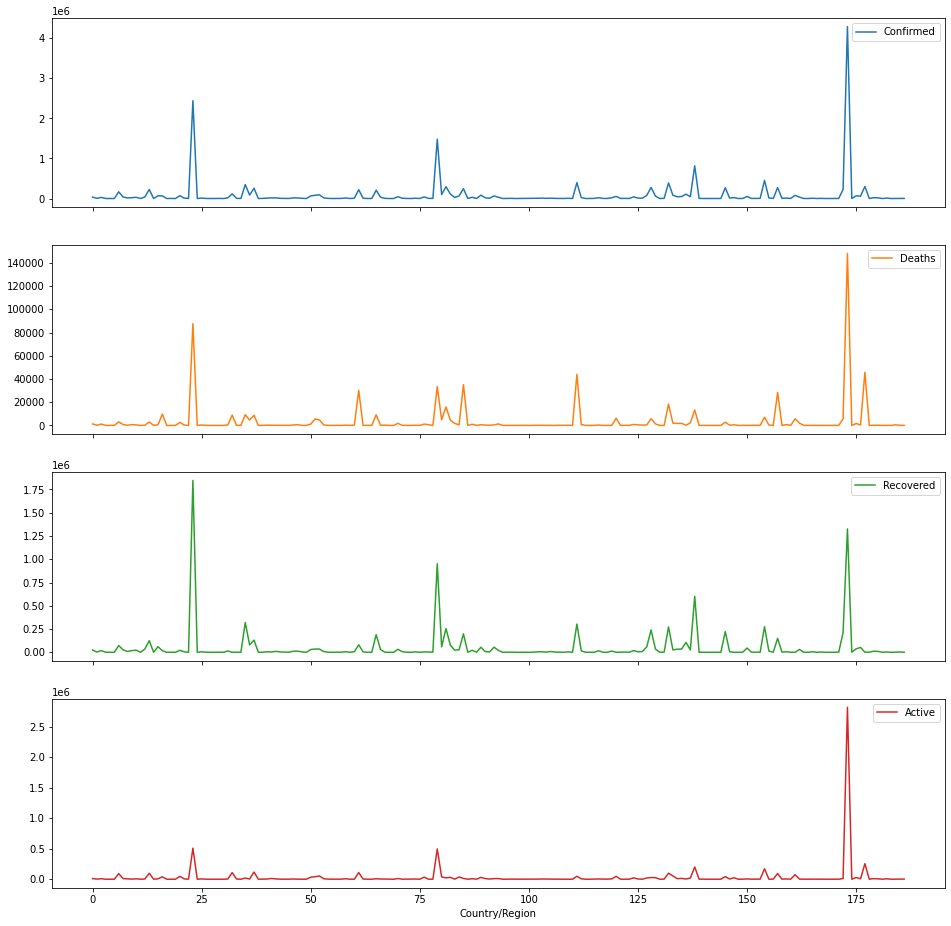

In [ ]:
#Plot the graph stating the country wise covid cases (Confirmed,Deaths,Recovered,Active)
df1.plot(subplots=True, figsize=(16,16), x="Country/Region");

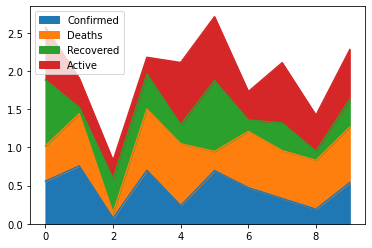

In [ ]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['Confirmed', 'Deaths', 'Recovered', 'Active'])
df.plot.area()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b68d48b50>],
      dtype=object)

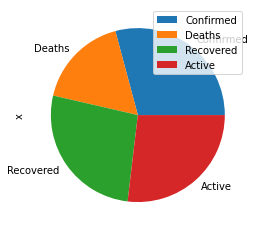

In [ ]:
df = pd.DataFrame(3 * np.random.rand(4), index=['Confirmed', 'Deaths', 'Recovered', 'Active'], columns=['x'])
df.plot.pie(subplots=True)